Stock Portfolio Analysis

In [1]:
# Import libaries

import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
# from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Check dotenv loaded correctly

load_dotenv()

True

In [3]:
# Set current amount of shares data

shares_data = {
    "shares": [10, 250, 1010,]
}

# Set the tickers

tickers = ["TNXP", "SNDL", "HYLN",]

# Create the shares DataFrame

df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data

df_shares

,shares
TNXP,10
SNDL,250
HYLN,1010


In [4]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
# Verify that Alpaca key and secret were correctly loaded

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [6]:
# Create the Alpaca API object

alpaca = trade_api.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [7]:
# Format current date as ISO format

today = pd.Timestamp("2022-01-11", tz="America/New_York").isoformat()

In [8]:
# Set timeframe to one day ('1D') for the Alpaca API

timeframe = "1D"

In [9]:
# Get current price data for Stocks

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data

df_portfolio

HYLN                               SNDL          \
                           open  high   low close   volume    open    high   
2022-01-11 00:00:00-05:00  5.37  5.66  5.24  5.56  3108535  0.5788  0.5987   

                                                       TNXP                   \
                              low   close    volume    open      high    low   
2022-01-11 00:00:00-05:00  0.5788  0.5859  52390876  0.3234  0.336299  0.317   

                                            
                            close   volume  
2022-01-11 00:00:00-05:00  0.3264  7882263

In [12]:
# Fetch the current closing prices from the DataFrame

tnxp_price = float(df_portfolio["TNXP"]["close"])
sndl_price = float(df_portfolio["SNDL"]["close"])
hyln_price = float(df_portfolio["HYLN"]["close"])

In [13]:
# Compute the current value in dollars of the stock portfolio

tnxp_value = tnxp_price * df_shares.loc["TNXP"]["shares"]
sndl_value = sndl_price * df_shares.loc["SNDL"]["shares"]
hyln_value = hyln_price * df_shares.loc["HYLN"]["shares"]


# Print the current value of the portfolio

print(f"The current value of the {df_shares.loc['TNXP']['shares']} TNXP shares is ${tnxp_value:0.2f}")
print(f"The current value of the {df_shares.loc['SNDL']['shares']} SNDL shares is ${sndl_value:0.2f}")
print(f"The current value of the {df_shares.loc['HYLN']['shares']} HYLN shares is ${hyln_value:0.2f}")



The current value of the 10 TNXP shares is $3.26
The current value of the 250 SNDL shares is $146.47
The current value of the 1010 HYLN shares is $5615.60


In [14]:
# Set the data for the shares value DataFrame

value_data = {
    "TNXP": [tnxp_value],
    "SNDL": [sndl_value],
    "HYLN": [hyln_value],
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,TNXP,SNDL,HYLN
0,3.264,146.475,5615.6


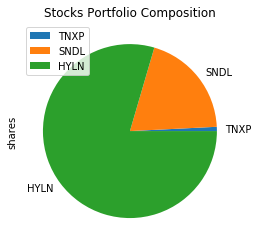

In [15]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

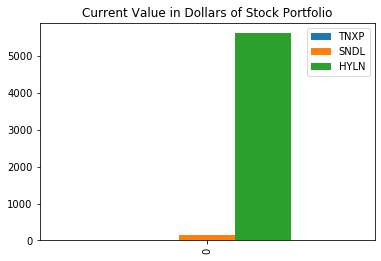

In [16]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current Value in Dollars of Stock Portfolio")

In [17]:
total_portfolio_value = [tnxp_value,
                            sndl_value,
                            hyln_value,

                        ]

In [18]:
sum(total_portfolio_value)

5765.338999999999